<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Copy_of_Energy_Balance_Ice_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
rc('font', **{'size' : 18})

In [ ]:
stefan = 5.67e-8 # Stefan-Boltzmann constant [W/m2/K4]
S0 = 342. # solar irradiance [W/m2]
aoc = 0.06 # open water albedo
aic = 0.8 # sea ice albedo
TK = 273.15
epsilon = .6
Lf = 334000 # J/kg latent heat of fusion of sea ice
rhoi = 950 # kg/m^3 density of sea ice

# Problem-specific variables
T_ice = -10 # in C
T_oc = -2 # in C
T_atm = -10 # in C

In [ ]:
def surf_SW(conc): # This evaluates the incoming solar radiation as a function of SIC
  return S0 * ((1-conc)*(1-aoc) + conc*(1-aic))

In [ ]:
def surf_LW_in(tatm): # This evaluates the incoming longwave radiation as a function of atmospheric temperature
  return stefan * epsilon * (TK + tatm)**4

In [ ]:
def surf_LW_out(tsrf): # This evaluates the incoming longwave radiation as a function of atmospheric temperature
  return stefan * (TK + tsrf)**4

In [ ]:
def surf_balance(conc,tatm,tsrf): # this is now the energy balance for
  return surf_SW(conc) + surf_LW_in(tatm) - surf_LW_out(tsrf)


In [ ]:
# Lets look at the energy balance for a set of different concentration values.
concvals = np.linspace(0,1,num=20)

T_surf = (T_oc*concvals + T_ice*(1-concvals))
Qsurf = np.zeros(len(concvals))

for i in range(0,len(concvals)):
    Qsurf[i] = surf_balance(concvals[i],T_atm,T_surf[i])

print(Qsurf)

[212.7231682  197.65882572 182.58610346 167.50497461 152.41541236
 137.31738981 122.21088005 107.0958561   91.97229097  76.84015759
  61.69942887  46.55007769  31.39207685  16.22539913   1.05001728
 -14.13409602 -29.32696813 -44.52862642 -59.73909834 -74.95841136]


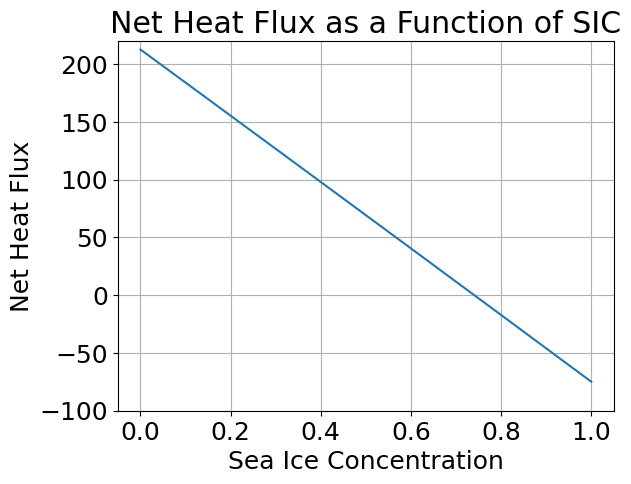

In [ ]:
# Now lets do some plotting!

plt.plot(concvals,Qsurf)
plt.grid(True)
plt.ylim([-100,220])
plt.xlabel('Sea Ice Concentration')
plt.ylabel('Net Heat Flux')
plt.title('Net Heat Flux as a Function of SIC')
plt.show()

 Now let's compute the growth rate of sea ice given the heat fluxes!

In [ ]:
# Remember the latent heat of fusion, and density of ice. Check your units!
growth_rate = Qsurf / (Lf / rhoi)

print(growth_rate)

[ 0.60505093  0.56220325  0.51933173  0.47643631  0.43351689  0.39057341
  0.3476058   0.30461396  0.26159783  0.21855733  0.17549239  0.13240292
  0.08928884  0.04615009  0.00298658 -0.04020177 -0.08341503 -0.12665328
 -0.1699166  -0.21320506]


Now let's consider the loss of sea ice in the Arctic! Use the NSIDC Sea Ice Index to Quantify the total area lost there.

HINT: you can think of the region where the sea ice is lost as a big area going from 1 to 0 sea ice concentration!

In [ ]:
# Remember to evaluate in units of Watts.


Now consider how much this increase in heat would be if it was caused by atmospheric warming! from the atmosphere alone! HINT: ΔQ ≈ 4T ΔT. HINT: in this case, we don't need to worry too much about the the overall ice-covered area. Just use Delta Q for any place where sea ice goes from 1 to 0.

In [ ]:
# Remember the hint!

Now consider how much that would translate to if it warmed the ocean!



In [ ]:
# This is similar to the above, but now remember we're thinking about the ocean here!

Calculate the Arctic Amplification!

In [ ]:
# this is a simple division
dTGW = 3 # change in temperature required to melt all sea ice

In [ ]:
def available_heat_per_cubic_meter(depth, density, volume_fraction, specific_heat_capacity, temperature, reference_temperature):
    """
    Calculate the available heat per cubic meter at a given depth.

    Args:
        depth (float): Depth (z) at which the calculation is performed.
        density (float): Density of the substance at the given depth.
        volume_fraction (float): Volume fraction of the substance.
        specific_heat_capacity (float): Specific heat capacity of the substance.
        temperature (float): Temperature at the given depth.
        reference_temperature (float): Reference temperature (Tf).

    Returns:
        float: Available heat per cubic meter at the given depth.
    """
    heat_difference = temperature - reference_temperature
    available_heat = density * volume_fraction * specific_heat_capacity * heat_difference

    return available_heat

# Example values
depth = 10  # Depth in meters
density = 1000  # Density in kg/m³
volume_fraction = 0.8  # Volume fraction
specific_heat_capacity = 4200  # Specific heat capacity in J/(kg°C)
temperature = 25  # Temperature in °C
reference_temperature = 0  # Reference temperature in °C

# Calculate available heat
available_heat = available_heat_per_cubic_meter(depth, density, volume_fraction, specific_heat_capacity, temperature, reference_temperature)
print(f"Available heat per cubic meter: {available_heat} J/m³")

Available heat per cubic meter: 84000000.0 J/m³


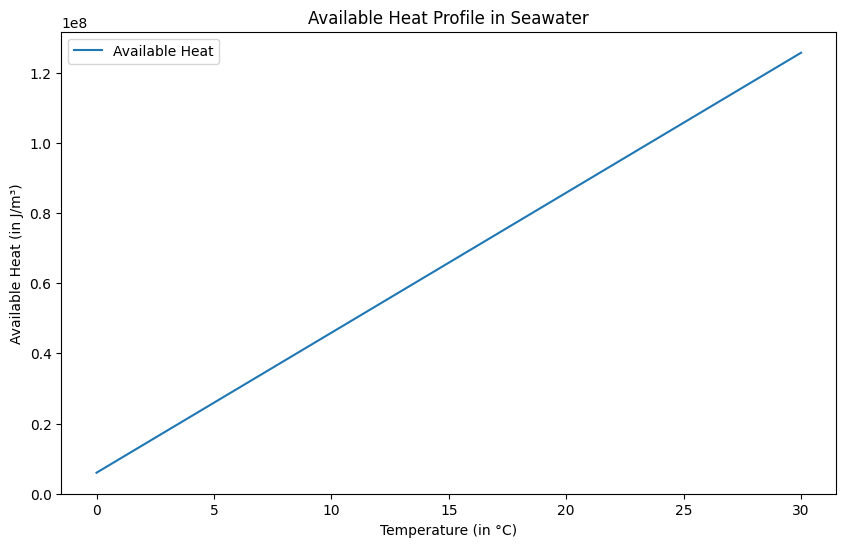

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

depths = np.linspace(0, 100, 1500)  # depths from 0 to 1500 meters
density = 1023  # density of seawater in kg/m³
volume_fraction = 1.0  # whole is seawater
c = 3900  # specific heat capacity of seawater in J/(kg°C)
Tf = -1.5  # freezing temperature of seawater in °C

T = np.linspace(0, 30, 100)  # temperatures from 0 to 30°C
H = density * volume_fraction * c * (T - Tf)

plt.figure(figsize=(10, 6))
plt.plot(T, H, label="Available Heat")
plt.xlabel("Temperature (in °C)")
plt.ylabel("Available Heat (in J/m³)")
plt.title("Available Heat Profile in Seawater")
plt.legend()
plt.show()

Available heat to depth D: 0.0 J/m²


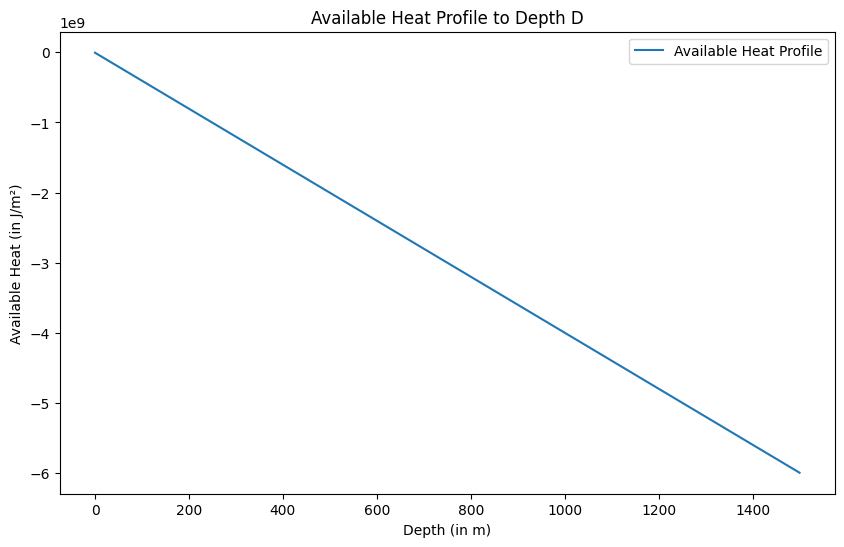

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d_water = 1023  # density of water in kg/m³
d_ice = 920  # density of sea ice in kg/m³
c_water = 3900  # specific heat capacity of water in J/(kg°C)
c_ice = 2900  # specific heat capacity of ice in J/(kg°C)
Lf_ice = 3.34*(10**5)  # latent heat of fusion for sea ice in J/kg
Tf = -1.5  # freezing temperature of surface water in °C

depth = np.linspace(0, 1500, 100)  # depth from 0 to 100 meters

H = d_water * c_water * (Tf - depth)  # H(z) = r * c * (T(z) - Tf)

D = 1500
D1 = np.trapz(H[:-D], depth[:-D])  # D = ∫[0 to -D] H(z) dz

print(f"Available heat to depth D: {D1} J/m²")

plt.figure(figsize=(10, 6))
plt.plot(depth, H, label="Available Heat Profile")
plt.xlabel("Depth (in m)")
plt.ylabel("Available Heat (in J/m²)")
plt.title("Available Heat Profile to Depth D")
plt.legend()
plt.show()


Depth D⇤ for melting 2 meters of sea ice: None meters


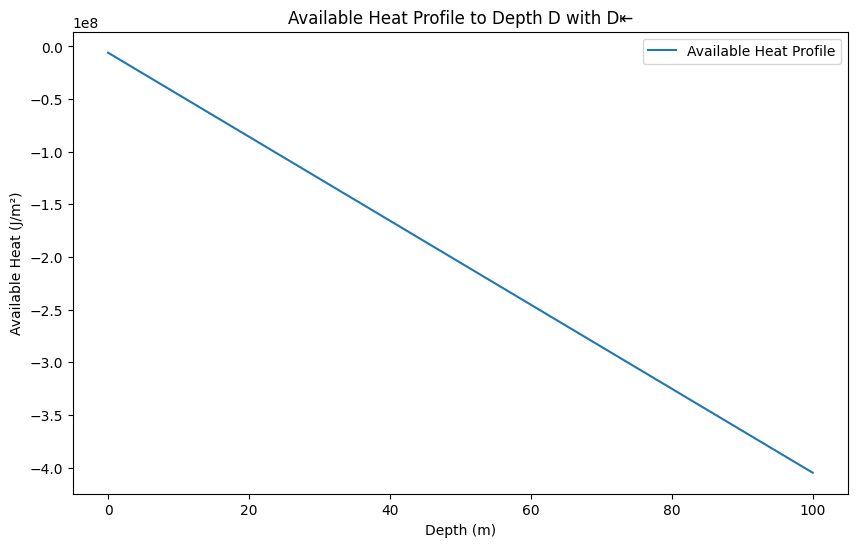

In [ ]:
density_ice = 920  # Density of sea ice in kg/m³
specific_heat_ice = 2900  # Specific heat capacity of ice in J/(kg°C)
latent_heat_fusion_ice = 3.34e5  # Latent heat of fusion for sea ice in J/kg
initial_temperature_ice = -5  # Initial temperature of sea ice in °C
thickness_melt = 2  # Thickness of sea ice to melt in meters

heat_required = density_ice * thickness_melt * specific_heat_ice * (0 - initial_temperature_ice) + latent_heat_fusion_ice

D_star = None
Q_cumulative = 0
for i in range(len(depths)):
    Q_cumulative += available_heat[i]
    if Q_cumulative >= heat_required:
        D_star = depths[i]
        break

print(f"Depth D for melting 2 meters of sea ice: {D_star} meters")

plt.figure(figsize=(10, 6))
plt.plot(depths, available_heat, label="Available Heat Profile")
plt.xlabel("Depth (m)")
plt.ylabel("Available Heat (J/m²)")
plt.title("Available Heat Profile to Depth D with D⇤")
plt.legend()
plt.show()


Depth D* for melting 2 meters of sea ice initially at -5°C: 0.0 meters


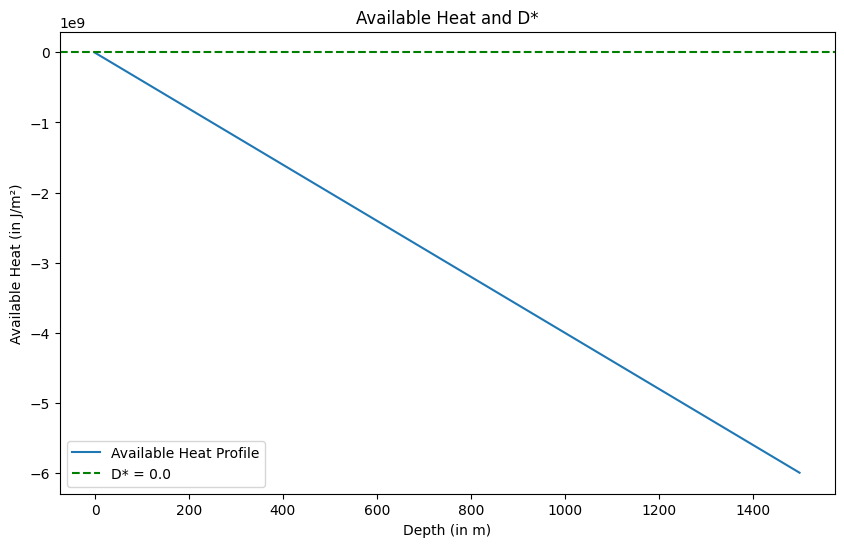

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

density_water = 1023
density_ice = 920
specific_heat_water = 3900
specific_heat_ice = 2900
latent_heat_fusion_ice = 3.34e5
reference_freezing_temperature = -1.5
depths = np.linspace(0, 1500, 100)
available_heat = density_water * specific_heat_water * (reference_freezing_temperature - depths)
Ti = -5
h = 2
heat_required_to_melt_ice = (density_ice * h * specific_heat_ice * (-reference_freezing_temperature - Ti)) + (h * latent_heat_fusion_ice)

cumulative_heat = np.cumsum(available_heat)
D_star_index = np.argmax(cumulative_heat >= heat_required_to_melt_ice)
D_star = depths[D_star_index]

print(f"Depth D* for melting 2 meters of sea ice initially at -5°C: {D_star} meters")

plt.figure(figsize=(10, 6))
plt.plot(depths, available_heat, label="Available Heat Profile")
plt.axhline(y=D_star, color='g', linestyle='--', label=f"D* = {D_star}")
plt.xlabel("Depth (in m)")
plt.ylabel("Available Heat (in J/m²)")
plt.title("Available Heat and D*")
plt.legend()
plt.show()
